In [1]:
import numpy as np

from __future__ import print_function
from standard_plots import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


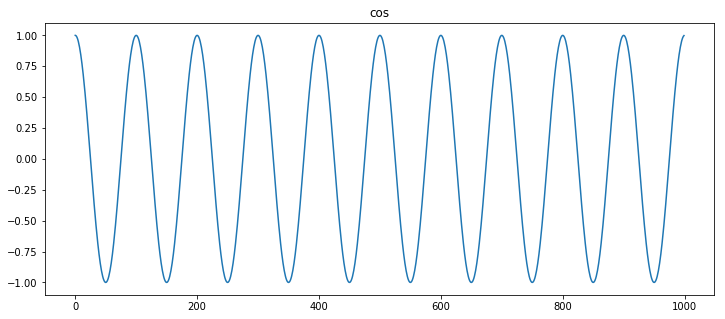

In [6]:
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))
plt_plot(y = dataset, title = 'cos')

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [8]:
x,y = create_dataset(dataset, look_back=3)
print(x.shape)
print(y.shape)
print(x[:5])
print(y[:5])

(997, 3)
(997,)
[[ 1.          0.99802673  0.9921147 ]
 [ 0.99802673  0.9921147   0.98228725]
 [ 0.9921147   0.98228725  0.96858316]
 [ 0.98228725  0.96858316  0.95105652]
 [ 0.96858316  0.95105652  0.92977649]]
[ 0.98228725  0.96858316  0.95105652  0.92977649  0.90482705]


## 20长度的滑动窗口进行预测

In [5]:
look_back = 20

#归一化，y值域为(0,1)
dataset = (dataset+1) / 2.

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [6]:
print('trainX.shape = ', trainX.shape)
print('testX.shape = ', testX.shape)
print('trainY.shape = ',trainY.shape)
print('testY.shape = ', testY.shape)

trainX.shape =  (780, 20, 1)
testX.shape =  (180, 20, 1)
trainY.shape =  (780,)
testY.shape =  (180,)


In [7]:
%%time
batch_size = 1

model = Sequential()
model.add(LSTM(32, input_shape=(20, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(trainX,trainY,batch_size = batch_size,epochs=30, verbose=2)

Epoch 1/30
10s - loss: 0.0177
Epoch 2/30
10s - loss: 0.0045
Epoch 3/30
10s - loss: 0.0034
Epoch 4/30
10s - loss: 0.0028
Epoch 5/30
10s - loss: 0.0026
Epoch 6/30
10s - loss: 0.0026
Epoch 7/30
10s - loss: 0.0021
Epoch 8/30
10s - loss: 0.0020
Epoch 9/30
10s - loss: 0.0020
Epoch 10/30
10s - loss: 0.0018
Epoch 11/30
10s - loss: 0.0015
Epoch 12/30
10s - loss: 0.0016
Epoch 13/30
10s - loss: 0.0015
Epoch 14/30
10s - loss: 0.0017
Epoch 15/30
10s - loss: 0.0015
Epoch 16/30
10s - loss: 0.0014
Epoch 17/30
10s - loss: 0.0016
Epoch 18/30
10s - loss: 0.0013
Epoch 19/30
10s - loss: 0.0013
Epoch 20/30
10s - loss: 0.0013
Epoch 21/30
10s - loss: 0.0015
Epoch 22/30
10s - loss: 0.0013
Epoch 23/30
10s - loss: 0.0016
Epoch 24/30
10s - loss: 0.0013
Epoch 25/30
10s - loss: 0.0014
Epoch 26/30
10s - loss: 0.0014
Epoch 27/30
10s - loss: 0.0014
Epoch 28/30
10s - loss: 0.0015
Epoch 29/30
10s - loss: 0.0014
Epoch 30/30
10s - loss: 0.0012
CPU times: user 8min 29s, sys: 54.2 s, total: 9min 23s
Wall time: 5min 8s


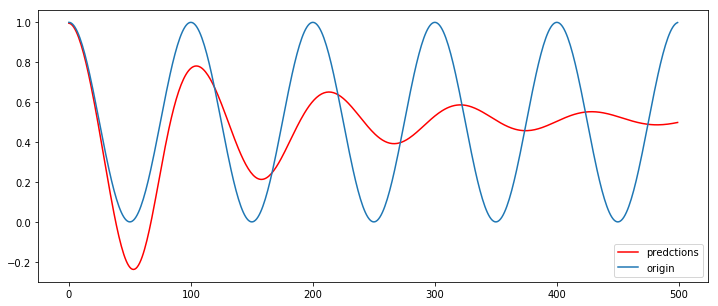

In [9]:
x = np.vstack((trainX[-1][1:],(trainY[-1])))
preds = []
pred_num = 500
for i in np.arange(pred_num):
    pred = model.predict(x.reshape((1,-1,1)),batch_size = batch_size)
    preds.append(pred.squeeze())
    x = np.vstack((x[1:],pred))
    
# print(preds[:20])
# print(np.array(preds).shape)
plt.figure(figsize=(12,5))
plt.plot(np.arange(pred_num),np.array(preds),'r',label='predctions')
cos_y = (np.cos(np.arange(pred_num)*(20*np.pi/1000))+1)/ 2.
plt.plot(np.arange(pred_num),cos_y,label='origin')
plt.legend()
plt.show()

In [15]:
%%time
# create and fit the LSTM network
batch_size = 1
model2 = Sequential()
model2.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
for i in range(30):
    model2.fit(trainX, trainY, epochs=1, batch_size=batch_size,  shuffle=False)
    model2.reset_states()

Epoch 1/1
780/780 [==============================] - 8s - loss: 0.0354     
Epoch 1/1
780/780 [==============================] - 13s - loss: 0.0039    
Epoch 1/1
780/780 [==============================] - 9s - loss: 0.0034     
Epoch 1/1
780/780 [==============================] - 9s - loss: 0.0028     
Epoch 1/1
780/780 [==============================] - 9s - loss: 0.0029     
Epoch 1/1
780/780 [==============================] - 9s - loss: 0.0026     
Epoch 1/1
780/780 [==============================] - 9s - loss: 0.0025     
Epoch 1/1
780/780 [==============================] - 9s - loss: 0.0027     
Epoch 1/1
780/780 [==============================] - 9s - loss: 0.0020     
Epoch 1/1
780/780 [==============================] - 8s - loss: 0.0029     
Epoch 1/1
780/780 [==============================] - 8s - loss: 0.0025     
Epoch 1/1
780/780 [==============================] - 8s - loss: 0.0031     
Epoch 1/1
780/780 [==============================] - 8s - loss: 0.0029     
Epoch 1/1
78

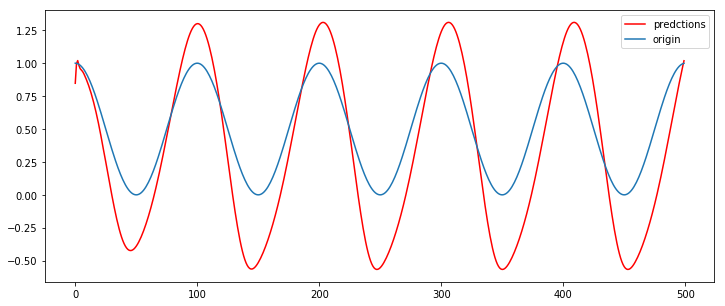

In [16]:
x = np.vstack((trainX[-1][1:],(trainY[-1])))
preds = []
pred_num = 500
for i in np.arange(pred_num):
    pred = model2.predict(x.reshape((1,-1,1)),batch_size = batch_size)
    preds.append(pred.squeeze())
    x = np.vstack((x[1:],pred))

# print(preds[:20])
# print(np.array(preds).shape)
plt.figure(figsize=(12,5))
plt.plot(np.arange(pred_num),np.array(preds),'r',label='predctions')
cos_y = (np.cos(np.arange(pred_num)*(20*np.pi/1000))+1)/ 2.
plt.plot(np.arange(pred_num),cos_y,label='origin')
plt.legend()
plt.show()

In [9]:
look_back =40
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))
#归一化，y值域为(0,1)
dataset = (dataset+1) / 2.

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:

%%time
# create and fit the LSTM network
batch_size = 1
model3 = Sequential()
model3.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model3.add(Dropout(0.3))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model3.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model3.reset_states()

CPU times: user 1h 28min 23s, sys: 9min 8s, total: 1h 37min 32s
Wall time: 53min 4s


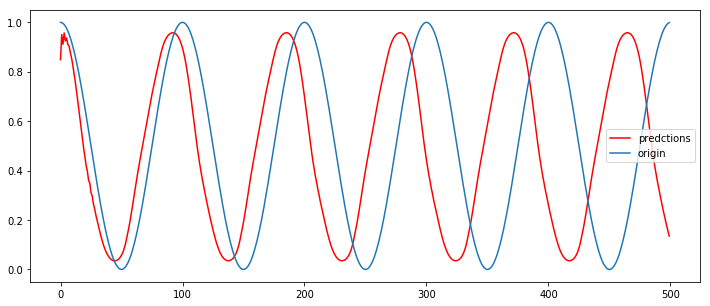

In [11]:
x = np.vstack((trainX[-1][1:],(trainY[-1])))
preds = []
pred_num = 500
for i in np.arange(pred_num):
    pred = model3.predict(x.reshape((1,-1,1)),batch_size = batch_size)
    preds.append(pred.squeeze())
    x = np.vstack((x[1:],pred))

# print(preds[:20])
# print(np.array(preds).shape)
plt.figure(figsize=(12,5))
plt.plot(np.arange(pred_num),np.array(preds),'r',label='predctions')
cos_y = (np.cos(np.arange(pred_num)*(20*np.pi/1000))+1)/ 2.
plt.plot(np.arange(pred_num),cos_y,label='origin')
plt.legend()
plt.show()                                                                                             

In [31]:
look_back =40
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))
#归一化，y值域为(0,1)
dataset = (dataset+1) / 2.

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]

trainX, trainY = create_dataset(train, look_back)
print(trainX.shape)
print(trainY.shape)

(760, 40)
(760,)


In [32]:
%%time
trainX = np.squeeze(trainX)
testX = np.squeeze(testX)
model4 = Sequential()
model4.add(Dense(units=32,input_dim=look_back,activation="relu"))
model4.add(Dropout(0.3))
for i in range(2):
    model4.add(Dense(units=32,activation="relu"))
    model4.add(Dropout(0.3))
model4.add(Dense(1))
model4.compile(loss='mse', optimizer='adagrad')
model4.fit(trainX, trainY, epochs=400, batch_size=32, verbose=0)

CPU times: user 17.1 s, sys: 504 ms, total: 17.6 s
Wall time: 12.3 s


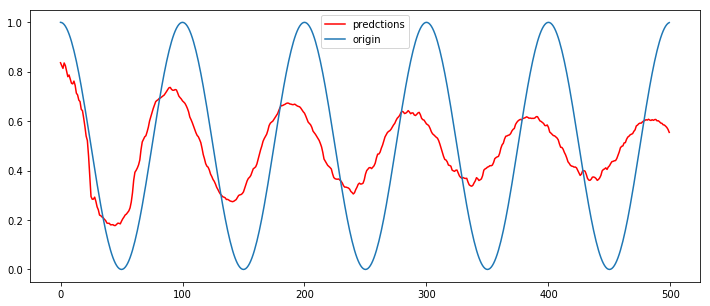

In [33]:
x = np.hstack((trainX[-1][1:],(trainY[-1])))
preds = []
pred_num = 500
for i in np.arange(pred_num):
    pred = model4.predict(x.reshape((1,-1)),batch_size = batch_size)
    preds.append(pred.squeeze())
    x = np.append(x[1:],pred)

# print(preds[:20])
# print(np.array(preds).shape)
plt.figure(figsize=(12,5))
plt.plot(np.arange(pred_num),np.array(preds),'r',label='predctions')
cos_y = (np.cos(np.arange(pred_num)*(20*np.pi/1000))+1)/ 2.
plt.plot(np.arange(pred_num),cos_y,label='origin')
plt.legend()
plt.show()        